In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("access-pattern-exp1-1000000000-u64.csv", delim_whitespace=True)
df["time per value (ns)"] = df["time (ms)"] / df["num_values"] * 10**6
df.head()

,name,num_values,num_threads,result,time (ms),time per value (ns)
0,single_threaded,100000000,16,15015203311993008001,24.4003,0.244003
1,atomic_contention,100000000,16,15015203311993008001,1449.3200,14.493200
2,false_cache_sharing,100000000,16,15015203311993008001,17.7492,0.177492
3,fixed,100000000,16,15015203311993008001,17.7249,0.177249
4,automatic_openmp,100000000,16,15015203311993008001,17.6409,0.176409


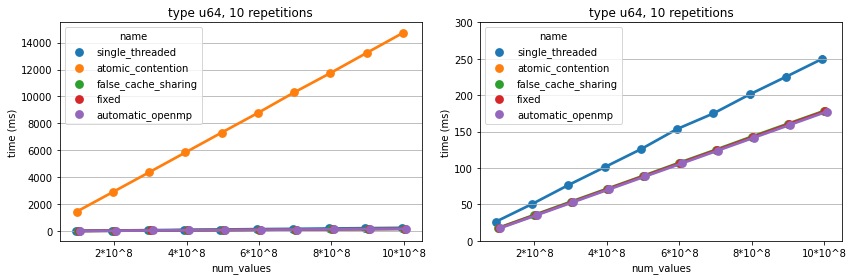

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[1].set_ylim((0, 300))
for ax in axes:
    ax.grid(True)
    ax.set_title("type u64, 10 repetitions")
    ax = sns.pointplot(x="num_values", y="time (ms)", hue="name", data=df, dodge=True, ax=ax)
    ax.set_xticks([1, 3, 5, 7, 9])
    ax.set_xticklabels(["2*10^8", "4*10^8", "6*10^8", "8*10^8", "10*10^8"])

fig.tight_layout()
plt.savefig("ap-exp1-time.pdf", dpi=300)
plt.show()

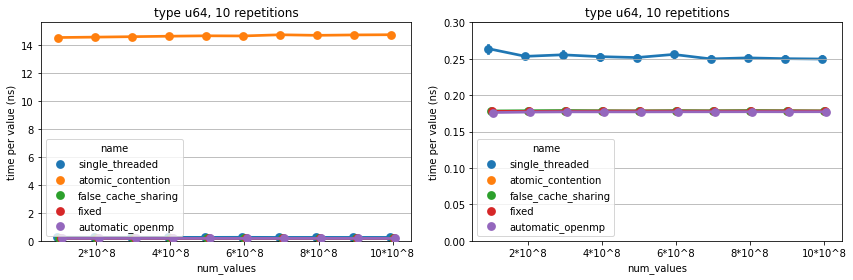

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].set_ylim((0, df["time per value (ns)"].max() * 1.05))
axes[1].set_ylim((0, 0.3))
for ax in axes:
    ax.grid(True)
    ax.set_title("type u64, 10 repetitions")
    ax = sns.pointplot(x="num_values", y="time per value (ns)", hue="name", data=df, dodge=True, ax=ax)
    ax.set_xticks([1, 3, 5, 7, 9])
    ax.set_xticklabels(["2*10^8", "4*10^8", "6*10^8", "8*10^8", "10*10^8"])

fig.tight_layout()
plt.savefig("ap-exp1-time-per-value.pdf", dpi=300)
plt.show()

In [5]:
df = pd.read_csv("access-pattern-exp2-1000000000-u64.csv", delim_whitespace=True)

T0 = df.loc[df["name"] == "single_threaded", "time (ms)"].mean()
df["speedup"] = 0
for name, df_name in df.groupby("name"):
    df.loc[df["name"] == name, "speedup"] = T0 / df_name["time (ms)"]
df["efficiency"] = df["speedup"] / df["num_threads"]

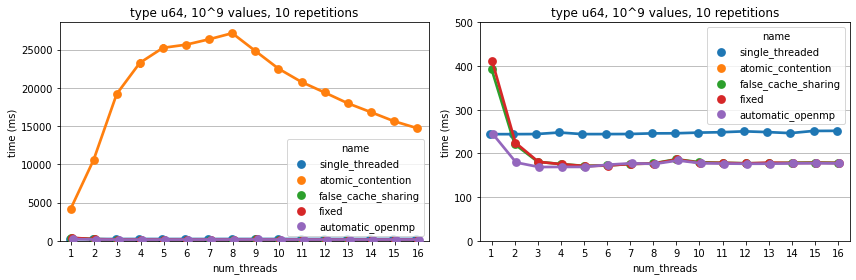

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_ylim((0, df["time (ms)"].max() * 1.05))
axes[1].set_ylim((0, 500))
for ax in axes:
    ax.grid(True)
    ax.set_title("type u64, 10^9 values, 10 repetitions")
    sns.pointplot(x="num_threads", y="time (ms)", hue="name", data=df, dodge=True, ax=ax)
fig.tight_layout()
plt.savefig("ap-exp2-time.pdf", dpi=300)
plt.show()

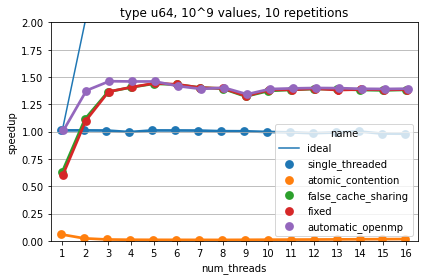

In [7]:
fig, ax = plt.subplots()
ax.set_ylim((0, 2))
ax.grid(True)
ax.set_title("type u64, 10^9 values, 10 repetitions")
ax.plot(range(16), range(1, 17), label="ideal")
sns.pointplot(x="num_threads", y="speedup", hue="name", data=df, dodge=True, ax=ax)
fig.tight_layout()
plt.savefig("ap-exp2-speedup.pdf", dpi=300)
plt.show()

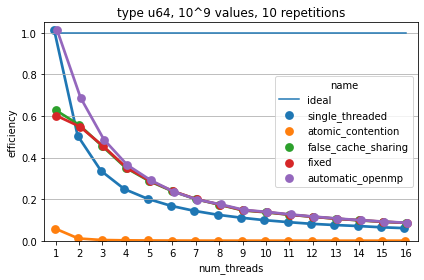

In [8]:
fig, ax = plt.subplots()
ax.set_ylim((0, 1.05))
ax.grid(True)
ax.set_title("type u64, 10^9 values, 10 repetitions")
ax.plot(range(16), [1] * 16, label="ideal")
sns.pointplot(x="num_threads", y="efficiency", hue="name", data=df, dodge=True, ax=ax)
fig.tight_layout()
plt.savefig("ap-exp2-efficiency.pdf", dpi=300)
plt.show()